# Surprising House Pricing Prediction Model using Advanced Regression
### Problem Statement
#### Company wants to know predict the actual value of the prospective properties and decide whether to invest in them or not. 
#### An optimized model needs to be built using regularization techniques that is neither underfitting nor overfitting

## Step 1: Reading and describing Data

In [1023]:
# Importing required libraries for the assignment
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [1024]:
housingdf = pd.read_csv('housingdata.csv')

In [1025]:
# Viewing the first few records of provided data to check dataset
housingdf.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [1026]:
# Finding information of bike data
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1027]:
# Checking for missing values in the dataset
housingdf['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

In [1028]:
housingdf['FireplaceQu'].info

<bound method Series.info of 0       NaN
1        TA
2        TA
3        Gd
4        TA
5       NaN
6        Gd
7        TA
8        TA
9        TA
10      NaN
11       Gd
12      NaN
13       Gd
14       Fa
15      NaN
16       TA
17      NaN
18      NaN
19      NaN
20       Gd
21       Gd
22       Gd
23       TA
24       TA
25       Gd
26      NaN
27       Gd
28       Gd
29      NaN
30      NaN
31      NaN
32      NaN
33       Gd
34       Gd
35       Gd
36      NaN
37       TA
38      NaN
39      NaN
40       TA
41       Gd
42      NaN
43      NaN
44      NaN
45       Gd
46       Ex
47      NaN
48      NaN
49      NaN
50      NaN
51       Gd
52      NaN
53       Gd
54       TA
55       Gd
56      NaN
57      NaN
58       Gd
59      NaN
60      NaN
61      NaN
62       Gd
63      NaN
64      NaN
65       Gd
66       Gd
67      NaN
68      NaN
69       TA
70       Gd
71      NaN
72       TA
73      NaN
74      NaN
75      NaN
76      NaN
77      NaN
78      NaN
79      NaN
80       Gd

####  Observation: 
##### There are missing values in the provided dataset 

In [1029]:
# Describing the dataset
newdf=housingdf[housingdf['LotFrontage'].notna()]

In [1036]:
#### Imputation of NA values
newdf['dtenum'] = newdf['LotFrontage'].astype(float)
newdf['dtenum'].median()

69.0

In [1037]:
housingdf['LotFrontage'] = housingdf['LotFrontage'].fillna("69.0")

In [1038]:
housingdf['Alley'] = housingdf['Alley'].fillna("NoAlleyAccess")

In [1039]:
housingdf['FireplaceQu'] = housingdf['FireplaceQu'].fillna("NoFirePlace")

In [1040]:
housingdf['MasVnrType'].value_counts()
naVnrTypedf = housingdf[(housingdf['MasVnrType'].isna())]
naVnrTypedf['MasVnrArea']

Series([], Name: MasVnrArea, dtype: float64)

In [1041]:
housingdf['MasVnrType'] = housingdf['MasVnrType'].fillna("None")

In [1042]:
housingdf['MasVnrArea'] = housingdf['MasVnrArea'].fillna("0")

In [1043]:
housingdf['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [1044]:
housingdf['BsmtQual'] = housingdf['BsmtQual'].fillna("NoBasement")

In [1045]:
housingdf['BsmtCond'] = housingdf['BsmtCond'].fillna("NoBasement")
housingdf['BsmtExposure'] = housingdf['BsmtExposure'].fillna("NoBasement")
housingdf['BsmtFinType1'] = housingdf['BsmtFinType1'].fillna("NoBasement")
housingdf['BsmtFinType2'] = housingdf['BsmtFinType2'].fillna("NoBasement")

In [1046]:
housingdf['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [1047]:
housingdf['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [1048]:
housingdf[(housingdf['Electrical'].isna())]

Id  MSSubClass MSZoning LotFrontage  LotArea Street          Alley  \
1379  1380          80       RL        73.0     9735   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
1379      Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1379       0      5   2008        WD         Normal     167500  

[1 rows x 81 columns]

In [1049]:
housingdf[(housingdf['Electrical'] == 'SBrkr')]

Id  MSSubClass MSZoning LotFrontage  LotArea Street          Alley  \
0        1          60       RL        65.0     8450   Pave  NoAlleyAccess   
1        2          20       RL        80.0     9600   Pave  NoAlleyAccess   
2        3          60       RL        68.0    11250   Pave  NoAlleyAccess   
3        4          70       RL        60.0     9550   Pave  NoAlleyAccess   
4        5          60       RL        84.0    14260   Pave  NoAlleyAccess   
5        6          50       RL        85.0    14115   Pave  NoAlleyAccess   
6        7          20       RL        75.0    10084   Pave  NoAlleyAccess   
7        8          60       RL        69.0    10382   Pave  NoAlleyAccess   
9       10         190       RL        50.0     7420   Pave  NoAlleyAccess   
10      11          20       RL        70.0    11200   Pave  NoAlleyAccess   
11      12          60       RL        85.0    11924   Pave  NoAlleyAccess   
12      13          20       RL        69.0    12968   Pave  NoAlleyAccess   
13      14          20       RL        91.0    10652   Pave  NoAlleyAccess   
14      15          20       RL        69.0    10920   Pave  NoAlleyAccess   
16      17          20       RL        69.0    11241   Pave  NoAlleyAccess   
17      18          90       RL        72.0    10791   Pave  NoAlleyAccess   
18      19          20       RL        66.0    13695   Pave  NoAlleyAccess   
19      20          20       RL        70.0     7560   Pave  NoAlleyAccess   
20      21          60       RL       101.0    14215   Pave  NoAlleyAccess   
22      23          20       RL        75.0     9742   Pave  NoAlleyAccess   
23      24         120       RM        44.0     4224   Pave  NoAlleyAccess   
24      25          20       RL        69.0     8246   Pave  NoAlleyAccess   
25      26          20       RL       110.0    14230   Pave  NoAlleyAccess   
26      27          20       RL        60.0     7200   Pave  NoAlleyAccess   
27      28          20       RL        98.0    11478   Pave  NoAlleyAccess   
28      29          20       RL        47.0    16321   Pave  NoAlleyAccess   
29      30          30       RM        60.0     6324   Pave  NoAlleyAccess   
30      31          70  C (all)        50.0     8500   Pave           Pave   
31      32          20       RL        69.0     8544   Pave  NoAlleyAccess   
32      33          20       RL        85.0    11049   Pave  NoAlleyAccess   
33      34          20       RL        70.0    10552   Pave  NoAlleyAccess   
34      35         120       RL        60.0     7313   Pave  NoAlleyAccess   
35      36          60       RL       108.0    13418   Pave  NoAlleyAccess   
36      37          20       RL       112.0    10859   Pave  NoAlleyAccess   
37      38          20       RL        74.0     8532   Pave  NoAlleyAccess   
38      39          20       RL        68.0     7922   Pave  NoAlleyAccess   
40      41          20       RL        84.0     8658   Pave  NoAlleyAccess   
41      42          20       RL       115.0    16905   Pave  NoAlleyAccess   
42      43          85       RL        69.0     9180   Pave  NoAlleyAccess   
43      44          20       RL        69.0     9200   Pave  NoAlleyAccess   
45      46         120       RL        61.0     7658   Pave  NoAlleyAccess   
46      47          50       RL        48.0    12822   Pave  NoAlleyAccess   
47      48          20       FV        84.0    11096   Pave  NoAlleyAccess   
48      49         190       RM        33.0     4456   Pave  NoAlleyAccess   
49      50          20       RL        66.0     7742   Pave  NoAlleyAccess   
50      51          60       RL        69.0    13869   Pave  NoAlleyAccess   
51      52          50       RM        52.0     6240   Pave  NoAlleyAccess   
52      53          90       RM       110.0     8472   Grvl  NoAlleyAccess   
53      54          20       RL        68.0    50271   Pave  NoAlleyAccess   
54      55          80       RL        60.0     7134   Pave  NoAlleyAccess   
55      56          20       R

In [1050]:
housingdf['Electrical'] = housingdf['Electrical'].fillna("SBrkr")

In [1051]:
housingdf['GarageType'] = housingdf['GarageType'].fillna("NoGarage")
housingdf['GarageFinish'] = housingdf['GarageFinish'].fillna("NoGarage")
housingdf['GarageQual'] = housingdf['GarageQual'].fillna("NoGarage")
housingdf['GarageCond'] = housingdf['GarageCond'].fillna("NoGarage")
housingdf['GarageYrBlt'] = housingdf['GarageYrBlt'].fillna("0")

In [1052]:
housingdf['PoolQC'] = housingdf['PoolQC'].fillna("NoPool")
housingdf['Fence'] = housingdf['Fence'].fillna("NoFence")

In [1053]:
housingdf['MiscFeature'] = housingdf['MiscFeature'].fillna("None")

In [1054]:
housingdf.isna().sum().sum()

0

In [1055]:
housingdf['LotFrontage'] = housingdf['LotFrontage'].astype(float)

In [1056]:
housingdf['MasVnrArea'] = housingdf['MasVnrArea'].astype(float) #MasVnrArea

In [1057]:
housingdf['MasVnrArea'] = housingdf['MasVnrArea'].astype(float)

In [1058]:
housingdf['GarageYrBlt'] = housingdf['GarageYrBlt'].astype(float)

In [1059]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Step 2: Data Visualisation

In [1060]:
#df1_sub = housingdf[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']]
#sns.pairplot(df1_sub)

In [1061]:
#plt.figure(figsize = (40,40))
#sns.heatmap(housingdf.corr(), annot=True, cmap="YlGnBu")

## Step 3: Data preparation for model building

In [1062]:
### Calculating age of property from sale year
def sold_after_age(built_yr, sold_yr):
    return (sold_yr-built_yr)
housingdf['sold_from_built'] = housingdf.apply(lambda x: sold_after_age(x.YearBuilt, x.YrSold), axis=1)
housingdf['sold_from_mod'] = housingdf.apply(lambda x: sold_after_age(x.YearRemodAdd, x.YrSold), axis=1)

In [1063]:
### Checking whether house has been remodelled after initial build
def remodelcheck(built_yr, remodel_yr):
    if built_yr != remodel_yr:
        return 1
    else:
        return 0
housingdf['remodeled'] = housingdf.apply(lambda x: remodelcheck(x.YearBuilt, x.YearRemodAdd), axis=1)

In [1064]:
### Calculating age of the garage
housingdf['garage_age'] = housingdf.apply(lambda x: sold_after_age(x.GarageYrBlt, x.YrSold), axis=1)

In [1065]:
#def remove spaces from Exterior values
def remove(string):
    return "".join(string.split())
housingdf['Exterior1st'] = housingdf['Exterior1st'].str.replace(' ','')

In [1066]:
housingdf['Exterior1st'] = housingdf['Exterior2nd'].str.replace('Brk Cmn','BrkComm')

In [1067]:
### Aligning values of Exterior2nd and Exteriror 1st
housingdf['Exterior2nd'] = housingdf['Exterior2nd'].str.replace('Brk Cmn','BrkComm')
housingdf['Exterior2nd'] = housingdf['Exterior2nd'].str.replace('Wd Shng','WdShing')
housingdf['Exterior2nd'] = housingdf['Exterior2nd'].str.replace(' ','')

In [1068]:
housingdf['Exterior1st'] = housingdf['Exterior1st'].str.replace(' ','')
housingdf['Exterior1st'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
WdSdng     197
Plywood    142
CmentBd     60
WdShng      38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
BrkComm      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior1st, dtype: int64

In [1069]:
### Cloumns removed either due to strong correlation (e.g., strong correlation between GrLivArea and Bedrooms etc.) 
### or values have been derived from some of the predictors 
### (e.g., YearBuilt","YearRemodAdd", GarageYrBlt","YrSold" are used for prperty age)  )
dropcollist = ["Id","GarageCars", "GrLivArea","TotalBsmtSF", "YearBuilt","YearRemodAdd","BedroomAbvGr","GarageYrBlt","YrSold"]
housingdffltrd = housingdf.drop(dropcollist, axis="columns")

In [1070]:
### Preparing categorical variables for creating dummies, making unique values for each column
varlist = ['MSSubClass']
housingdffltrd['MSSubClass'] = housingdffltrd[varlist].apply(lambda x: x.map({20: "ONESTORYA", 30: "ONESTORYB", 40: "ONESTORYC", 45: "ONEHALFSTORYD", 50: "ONEHALFSTORYE", 60: "TWOSTORYF", 70: "TWOSTORYG", 75: "TWOSTORYH", 80: "SPLITMULTII", 85: "SPLITMULTIJ", 90: "DUPLEXK", 120: "ONESTORYPUDL", 150: "ONEHSTORYPUDM", 160: "TWOSTORYPUDN" , 180: "PUDMULTIO" , 190:"FAMILYCONVP"}))

In [1071]:
varlist = ['Condition1']
housingdffltrd['Condition1'] = housingdffltrd[varlist].apply(lambda x: x.map({'Artery': "Artery1", 'Feedr': "Feedr1", 'Norm': "Norm1", 'RRNn': "RRNn1", 'RRAn': "RRAn1", 'PosN': "PosN1", 'PosA': "PosA1", 'RRNe': "RRNe1", 'RRAe': "RRAe1"}))
varlist = ['Condition2']
housingdffltrd['Condition2'] = housingdffltrd[varlist].apply(lambda x: x.map({'Artery': "Artery2", 'Feedr': "Feedr2", 'Norm': "Norm2", 'RRNn': "RRNn2", 'RRAn': "RRAn2", 'PosN': "PosN2", 'PosA': "PosA2", 'RRNe': "RRNe2", 'RRAe': "RRAe2"}))
varlist = ['BldgType']
housingdffltrd['BldgType'] = housingdffltrd[varlist].apply(lambda x: x.map({'1Fam': "OneFam", '2FmCon': "TwoFmCon", 'Duplx': "Duplx", 'TwnhsE': "TwnhsE", 'TwnhsI': "TwnhsI"}))
varlist = ['HouseStyle']
housingdffltrd['HouseStyle'] = housingdffltrd[varlist].apply(lambda x: x.map({'1Story': "OneStory", '1.5Fin': "OnehalfFin", '1.5Unf': "OneHlfUnf", 'SFoyer': "SFoyer", 'SLvl': "SLvl"}))
varlist = ['OverallQual']
housingdffltrd['OverallQual'] = housingdffltrd[varlist].apply(lambda x: x.map({'10': "VExQ", '9': "ExQ", '8': "VGQ", '7': "GQ", '6': "AAQ", '5': "AQ", '4': "BAQ", '3': "FairQ", '2': "PoorQ", '1': "VPoorQ"}))
varlist = ['OverallCond']
housingdffltrd['OverallCond'] = housingdffltrd[varlist].apply(lambda x: x.map({'10': "VExC", '9': "ExC", '8': "VGC", '7': "GC", '6': "AAC", '5': "AC", '4': "BAC", '3': "FairC", '2': "PoorC", '1': "VPoorC"}))
varlist = ['CentralAir']
housingdffltrd['CentralAir'] = housingdffltrd[varlist].apply(lambda x: x.map({'Y': 1, 'N': 0}))
varlist = ['MoSold']
housingdffltrd['MoSold'] = housingdffltrd[varlist].apply(lambda x: x.map({1: 'JanSell', 2: 'FebSell', 3: 'MarSell', 4: 'AprSell', 5: 'MaySell', 6: 'JunSell', 7: 'JulSell', 8: 'AugSell', 9: 'SepSell', 10: 'OctSell', 11: 'NovSell', 12: 'DecSell'}))
varlist = ['Exterior1st']
housingdffltrd['Exterior1st'] = housingdffltrd[varlist].apply(lambda x: x + '_extr1')
varlist = ['Exterior2nd']
housingdffltrd['Exterior2nd'] = housingdffltrd[varlist].apply(lambda x: x + '_extr2')
varlist = ['ExterQual']
housingdffltrd['ExterQual'] = housingdffltrd[varlist].apply(lambda x: x + '_qlty')
varlist = ['ExterCond']
housingdffltrd['ExterCond'] = housingdffltrd[varlist].apply(lambda x: x + '_cond')
varlist = ['BsmtQual']
housingdffltrd['BsmtQual'] = housingdffltrd[varlist].apply(lambda x: x + '_bql')
varlist = ['BsmtCond']
housingdffltrd['BsmtCond'] = housingdffltrd[varlist].apply(lambda x: x + '_bcn')
varlist = ['BsmtExposure']
housingdffltrd['BsmtExposure'] = housingdffltrd[varlist].apply(lambda x: x + '_bexp')
varlist = ['BsmtFinType1']
housingdffltrd['BsmtFinType1'] = housingdffltrd[varlist].apply(lambda x: x + '_bft1')
varlist = ['BsmtFinType2']
housingdffltrd['BsmtFinType2'] = housingdffltrd[varlist].apply(lambda x: x + '_bft2')
varlist = ['HeatingQC']
housingdffltrd['HeatingQC'] = housingdffltrd[varlist].apply(lambda x: x + '_hqc')
varlist = ['KitchenQual']
housingdffltrd['KitchenQual'] = housingdffltrd[varlist].apply(lambda x: x + '_kql')
varlist = ['FireplaceQu']
housingdffltrd['FireplaceQu'] = housingdffltrd[varlist].apply(lambda x: x + '_fql')
varlist = ['GarageQual']
housingdffltrd['GarageQual'] = housingdffltrd[varlist].apply(lambda x: x + '_gql')
varlist = ['GarageCond']
housingdffltrd['GarageCond'] = housingdffltrd[varlist].apply(lambda x: x + '_gqc')
varlist = ['PoolQC']
housingdffltrd['PoolQC'] = housingdffltrd[varlist].apply(lambda x: x + '_pql')
varlist = ['MasVnrType']
housingdffltrd['MasVnrType'] = housingdffltrd[varlist].apply(lambda x: x + '_vnrt')
varlist = ['Alley']
housingdffltrd['Alley'] = housingdffltrd[varlist].apply(lambda x: x + '_alley')
varlist = ['MiscFeature']
housingdffltrd['MiscFeature'] = housingdffltrd[varlist].apply(lambda x: x + '_misc')
varlist = ['LandSlope']
housingdffltrd['LandSlope'] = housingdffltrd[varlist].apply(lambda x: x + '_lnds')

In [1072]:
### Creating dummies
catvarlist = ["MSSubClass","MSZoning","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","OverallQual","OverallCond","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC","Electrical","KitchenQual","Functional","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PavedDrive","PoolQC","Fence","MiscFeature","SaleType","SaleCondition","MoSold"]
for i in catvarlist:
    #print(housingdffltrd[i].value_counts())
    dseason = pd.get_dummies(housingdffltrd[i], drop_first = True) #bikefltrddf.drop(['season'], axis = 1, inplace = True)
    housingdffltrd = pd.concat([housingdffltrd, dseason], axis=1)
    housingdffltrd.drop([i], axis = 1, inplace = True)
    

In [1073]:
### Column count has increaed to 272 due to dummy variables
housingdffltrd.describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     69.863699   10516.828082   103.117123   443.639726    46.549315   
std      22.027677    9981.264932   180.731373   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7553.500000     0.000000     0.000000     0.000000   
50%      69.000000    9478.500000     0.000000   383.500000     0.000000   
75%      79.000000   11601.500000   164.250000   712.250000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF   CentralAir     1stFlrSF     2ndFlrSF  LowQualFinSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  ...   
mean    567.240411     0.934932  1162.626712   346.992466      5.844521  ...   
std     441.866955     0.246731   386.587738   436.528436     48.623081  ...   
min       0.000000     0.000000   334.000000     0.000000      0.000000  ...   
25%     223.000000     1.000000   882.000000     0.000000      0.000000  ...   
50%     477.500000     1.000000  1087.000000     0.000000      0.000000  ...   
75%     808.000000     1.000000  1391.250000   728.000000      0.000000  ...   
max    2336.000000     1.000000  4692.000000  2065.000000    572.000000  ...   

           DecSell      FebSell      JanSell      JulSell      JunSell  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.040411     0.035616     0.039726     0.160274     0.173288   
std       0.196989     0.185395     0.195382     0.366986     0.378625   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           MarSell      MaySell      NovSell      OctSell      SepSell  
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  
mean      0.072603     0.139726     0.054110     0.060959     0.043151  
std       0.259572     0.346821     0.226311     0.239337     0.203266  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 272 columns]

In [1074]:
housingdffltrd.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  DecSell  FebSell  \
0           1       856       854             0  ...        0        1   
1           1      1262         0             0  ...        0        0   
2           1       920       866             0  ...        0        0   
3           1       961       756             0  ...        0        1   
4           1      1145      1053             0  ...        1        0   

   JanSell  JulSell  JunSell  MarSell  MaySell  NovSell  OctSell  SepSell  
0        0        0        0        0        0        0        0        0  
1        0        0        0        0        1        0        0        0  
2        0        0        0        0        0        0        0        1  
3        0        0        0        0        0        0        0        0  
4        0        0        0        0        0        0        0        0  

[5 rows x 272 columns]

In [1075]:
#housingdffltrdbkp = housingdffltrd
housingdffltrd.describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     69.863699   10516.828082   103.117123   443.639726    46.549315   
std      22.027677    9981.264932   180.731373   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7553.500000     0.000000     0.000000     0.000000   
50%      69.000000    9478.500000     0.000000   383.500000     0.000000   
75%      79.000000   11601.500000   164.250000   712.250000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF   CentralAir     1stFlrSF     2ndFlrSF  LowQualFinSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  ...   
mean    567.240411     0.934932  1162.626712   346.992466      5.844521  ...   
std     441.866955     0.246731   386.587738   436.528436     48.623081  ...   
min       0.000000     0.000000   334.000000     0.000000      0.000000  ...   
25%     223.000000     1.000000   882.000000     0.000000      0.000000  ...   
50%     477.500000     1.000000  1087.000000     0.000000      0.000000  ...   
75%     808.000000     1.000000  1391.250000   728.000000      0.000000  ...   
max    2336.000000     1.000000  4692.000000  2065.000000    572.000000  ...   

           DecSell      FebSell      JanSell      JulSell      JunSell  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.040411     0.035616     0.039726     0.160274     0.173288   
std       0.196989     0.185395     0.195382     0.366986     0.378625   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           MarSell      MaySell      NovSell      OctSell      SepSell  
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  
mean      0.072603     0.139726     0.054110     0.060959     0.043151  
std       0.259572     0.346821     0.226311     0.239337     0.203266  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 272 columns]

In [1076]:
### Insignificant predictors are dropped from the list

droplst = ['TenC_misc',
'Pave_alley',
'BsmtHalfBath',
'TWOSTORYPUDN',
'NoFirePlace_fql',
'FR3',
'MarSell',
'PUDMULTIO',
'AsphShn_extr1',
'AsphShn_extr2',
'Norm2',
'SBrkr',
'RRNe1',
'CBlock',
'Plywood_extr1',
'Plywood_extr2',
'RRAn2',
'BrkComm_extr1',
'BrkComm_extr2',
'JanSell',
'Po_hqc',
'WdShng_extr1',
'WdShing_extr2',
'Mod_lnds',
'GdWo',
'Fa_hqc',
'Stone_extr1',
'Stone_extr2',
'OldTown',
'IDOTRR',
'Feedr2',
'NoBasement_bexp',
'GasW',
'SepSell',
'FAMILYCONVP',
'EnclosedPorch',
'Feedr1',
'Oth',
'BsmtFullBath',
'OthW',
'BLQ_bft1',
'SawyerW',
'IR3',
'BrkFace_vnrt',
'TwnhsE',
'PConc',
'SWISU',
'NoFence',
'ONESTORYC',
'NovSell',
'Family',
'PosA2',
'OneStory',
'GasA',
'Low',
'NoBasement_bql',
'NoBasement_bcn',
'NoBasement_bft1',
'BrkSide',
'Grav',
'Po_gqc',
'ImStucc_extr1',
'ImStucc_extr2',
'Maj2',
'Inside',
'NWAmes',
'Mansard',
'Unf',
'FuseF',
'WdSdng_extr1',
'WdSdng_extr2',
'GLQ_bft2',
'FullBath',
'RRNn1',
'SPLITMULTII',
'IR2',
'None_misc',
'LowQualFinSF',
'P',
'HdBoard_extr1',
'HdBoard_extr2',
'Y',
'Mix',
'Shed_misc',
'MeadowV',
'FuseP',
'Gilbert',
'CBlock_extr1',
'CBlock_extr2',
'Gd_bcn',
'Sawyer',
'MiscVal',
'NoSeWa',
'Mn_bexp',
'SPLITMULTIJ',
'RRNn2',
'Gd_fql',
'MnWw',
'Unf_bft1',
'NoBasement_bft2',
'RFn',
'ScreenPorch',
'MetalSd_extr1',
'MetalSd_extr2',
'SLvl',
'HalfBath',
'CollgCr',
'DecSell',
'Timber',
'NAmes',
'Othr_misc',
'Rec_bft1',
'JunSell',
'ConLI',
'TA_gqc',
'ONESTORYPUDL',
'TA_gql',
'NoAlleyAccess_alley',
'MnPrv',
'None_vnrt',
'ClearCr',
'BrDale',
'CmentBd_extr1',
'CmentBd_extr2',
'NoGarage',
'NoGarage',
'NoGarage_gql',
'NoGarage_gqc',
'ConLw',
'JulSell',
'VinylSd_extr1',
'VinylSd_extr2',
'PosN1',
'Gd_gql',
'FebSell',
'SFoyer',
'TA_fql',
'garage_age',
'TWOSTORYH',
'AdjLand',
'LwQ_bft1',
'Blueste',
'Po_bcn',
'WD',
'ONEHALFSTORYE',
'Min1',
'OctSell',
'TA_bcn',
'Po_fql',
'3SsnPorch',
'Gd_hqc',
'Fa_cond',
'Somerst',
'Veenker',
'Wall',
'Mod',
'OnehalfFin',
'Stone',
'Fa_fql',
'RRAn1',
'Basment',
'Stone_vnrt',
'Wood',
'Fa_gqc',
'Normal',
'Gd_cond',
'TA_cond',
'Fa_bql',
'RRAe2',
'Reg',
'Fa_qlty',
'CarPort',
'TWOSTORYG',
'BuiltIn',
'Gambrel',
'Shed',
'Gd_gqc',
'TWOSTORYF',
'FR2',
'TotRmsAbvGrd',
'CWD',
'ConLD',
'PosA1',
'Detchd',
'Po_gql',
'Slab',
'Gable',
'Fireplaces',
'ONESTORYB',
'Hip',
'Stucco_extr1',
'Stucco_extr2',
'AugSell',
'TA_hqc',
'Attchd',
'CentralAir',
'Partial',
'BrkFace_extr1',
'New',
'BrkFace_extr2',
'Other_extr1',
'Other_extr2',
'Po_cond',
'CompShg',
"Tar&Grv",
'PoolArea',
'WdShake',
'WdShngl',
'NoPool_pql',
'Roll',
'Membran',
'Metal',
'Gd_pql',
'RL',
'RM',
'Fa_pql',
'TA_qlty',
             'BLQ_bft2',
  'LwQ_bft2',
  'Rec_bft2',
  'Min2',
  'Alloca',
  'Sev_lnds',
  'RH',
  'NPkVill',
           'Pave',
'1stFlrSF',
'Unf_bft2',
'Typ',
'Lvl',
'BsmtUnfSF',
'TA_kql',
'BsmtFinSF1',
'Fa_kql',
'Fa_gql',
'FV',
'HLS',
'KitchenAbvGr',
'BsmtFinSF2'
]

In [1077]:
housingdffltrdtemp = housingdffltrd.drop(droplst, axis="columns")

In [1078]:
housingdffltrdtemp.head()

LotFrontage  LotArea  MasVnrArea  2ndFlrSF  GarageArea  WoodDeckSF  \
0         65.0     8450       196.0       854         548           0   
1         80.0     9600         0.0         0         460         298   
2         68.0    11250       162.0       866         608           0   
3         60.0     9550         0.0       756         642           0   
4         84.0    14260       350.0      1053         836         192   

   OpenPorchSF  SalePrice  sold_from_built  sold_from_mod  ...  Gd_qlty  \
0           61     208500                5              5  ...        1   
1            0     181500               31             31  ...        0   
2           42     223500                7              6  ...        1   
3           35     140000               91             36  ...        0   
4           84     250000                8              8  ...        1   

   Gd_bql  TA_bql  Gd_bexp  No_bexp  GLQ_bft1  Gd_kql  Sev  Con  MaySell  
0       1       0        0        1         1       1    0    0        0  
1       1       0        1        0         0       0    0    0        1  
2       1       0        0        0         1       1    0    0        0  
3       0       1        0        1         0       1    0    0        0  
4       1       0        0        0         1       1    0    0        0  

[5 rows x 33 columns]

## Step 4 : Splitting data set into train and test set

In [1079]:
from sklearn.model_selection import train_test_split

In [1080]:
np.random.seed(0)
df_train, df_test = train_test_split(housingdffltrdtemp, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.head()

LotFrontage  LotArea  MasVnrArea  2ndFlrSF  GarageArea  WoodDeckSF  \
210          67.0     5604         0.0         0           0           0   
318          90.0     9900       256.0      1274         656         340   
239          52.0     8741         0.0       689         220           0   
986          59.0     5310         0.0       634         255         394   
1416         60.0    11340         0.0      1044         560           0   

      OpenPorchSF  SalePrice  sold_from_built  sold_from_mod  ...  Gd_qlty  \
210             0      98000               83             58  ...        0   
318            60     260000               16             16  ...        1   
239           140     113000               65             60  ...        0   
986             0     117000               96              3  ...        0   
1416            0     122500              125             60  ...        0   

      Gd_bql  TA_bql  Gd_bexp  No_bexp  GLQ_bft1  Gd_kql  Sev  Con  MaySell  
210        0       1        0        1         0       0    0    0        0  
318        1       0        1        0         1       1    0    0        0  
239        0       1        0        1         0       0    0    0        0  
986        0       1        0        1         0       1    0    0        0  
1416       0       1        0        1         0       0    0    0        0  

[5 rows x 33 columns]

## Step 5 : Scaling training continuous data using MinMaxScaler normalizer

In [1081]:
df_train_bkp = df_train
df_train = df_train_bkp

In [1082]:
df_train_bkp.head()

LotFrontage  LotArea  MasVnrArea  2ndFlrSF  GarageArea  WoodDeckSF  \
210          67.0     5604         0.0         0           0           0   
318          90.0     9900       256.0      1274         656         340   
239          52.0     8741         0.0       689         220           0   
986          59.0     5310         0.0       634         255         394   
1416         60.0    11340         0.0      1044         560           0   

      OpenPorchSF  SalePrice  sold_from_built  sold_from_mod  ...  Gd_qlty  \
210             0      98000               83             58  ...        0   
318            60     260000               16             16  ...        1   
239           140     113000               65             60  ...        0   
986             0     117000               96              3  ...        0   
1416            0     122500              125             60  ...        0   

      Gd_bql  TA_bql  Gd_bexp  No_bexp  GLQ_bft1  Gd_kql  Sev  Con  MaySell  
210        0       1        0        1         0       0    0    0        0  
318        1       0        1        0         1       1    0    0        0  
239        0       1        0        1         0       0    0    0        0  
986        0       1        0        1         0       1    0    0        0  
1416       0       1        0        1         0       0    0    0        0  

[5 rows x 33 columns]

In [1083]:
df_train_bkp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 210 to 79
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LotFrontage      1021 non-null   float64
 1   LotArea          1021 non-null   int64  
 2   MasVnrArea       1021 non-null   float64
 3   2ndFlrSF         1021 non-null   int64  
 4   GarageArea       1021 non-null   int64  
 5   WoodDeckSF       1021 non-null   int64  
 6   OpenPorchSF      1021 non-null   int64  
 7   SalePrice        1021 non-null   int64  
 8   sold_from_built  1021 non-null   int64  
 9   sold_from_mod    1021 non-null   int64  
 10  remodeled        1021 non-null   int64  
 11  ONEHALFSTORYD    1021 non-null   uint8  
 12  ONESTORYA        1021 non-null   uint8  
 13  CulDSac          1021 non-null   uint8  
 14  Crawfor          1021 non-null   uint8  
 15  Edwards          1021 non-null   uint8  
 16  Mitchel          1021 non-null   uint8  
 17  NoRidge       

In [1085]:
### Scaling data
from sklearn.preprocessing import MinMaxScaler

In [1086]:
scaler = MinMaxScaler()

In [1087]:
#numvars = ["LotFrontage", "LotArea", "sold_from_built", "sold_from_mod", "BsmtFinSF1", "BsmtFinSF2","BsmtUnfSF","1stFlrSF","2ndFlrSF","LowQualFinSF","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","KitchenAbvGr","Fireplaces","garage_age","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
#numvars = ['RRNn2','Gd_fql','MnWw','Unf','NoBasement_bft2','RFn','ScreenPorch','MetalSd_extr1','MetalSd_extr2','SLvl','HalfBath','CollgCr','DecSell','Timber','NAmes','Othr','Rec','JunSell','ConLI','TA_gqc','ONESTORYPUDL','TA_gql','NoAlleyAccess_alley','MnPrv','None_vnrt','ClearCr','BrDale','CmentBd_extr1','CmentBd_extr2','NoGarage','NoGarage','NoGarage_gql','NoGarage_gqc','ConLw','JulSell','VinylSd_extr1','VinylSd_extr2','PosN1','Gd_gql','FebSell','SFoyer','TA_fql','garage_age','TWOSTORYH','AdjLand','LwQ','Blueste','Po_bcn','WD','ONEHALFSTORYE','Min1','OctSell','TA_bcn','Po_fql','3SsnPorch','Gd_hqc','Fa_cond','Somerst','Veenker','Wall','Mod','OnehalfFin','Stone','Fa_fql','RRAn1','Basment','Stone_vnrt','Wood','Fa_gqc','Normal','Gd_cond','TA_cond','Fa_bql','RRAe2','Reg','Fa_qlty','NridgHt','Slab','Gable','CWD','OpenPorchSF','Hip','Edwards','LwQ_bft2','AugSell','CentralAir','TotRmsAbvGrd','Gambrel','FR2','Min2','MaySell','TA_hqc','Lvl','HLS','Unf_bft2','Attchd','Fireplaces','WoodDeckSF','BuiltIn','Pave','CarPort','Po_gql','Stucco_extr1','Stucco_extr2','ConLD','TWOSTORYF','NPkVill','RRAe1','Gd_gqc','Con','Mitchel','Fa_gql','Detchd','TWOSTORYG','BrkFace_extr1','BrkFace_extr2','Sev','GLQ','LotFrontage','ONESTORYB','Rec_bft2','KitchenAbvGr','Shed','Alloca','Crawfor','No_bexp','PosA1','BLQ_bft2','ONESTORYA','remodeled','RH','NoRidge','FV','ONEHALFSTORYD','BsmtFinSF2','RM','sold_from_mod','CulDSac','Norm1','Typ','GarageArea','RL','Sev','StoneBr','TA_bql','New','Partial','const','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','PoolArea','sold_from_built','PosN2','CompShg','Membran','Metal','Roll','Tar&Grv','WdShake','WdShngl','Other_extr1','Other_extr2','Gd_qlty','TA_qlty','Po_cond','Gd_bql','Gd_bexp','Fa_kql','Gd_kql','TA_kql','Fa_pql','Gd_pql','NoPool_pql']
numvars = ["LotFrontage", "LotArea", "sold_from_built", "sold_from_mod", "2ndFlrSF","GarageArea","WoodDeckSF","OpenPorchSF","SalePrice"]
df_train[numvars]

LotFrontage  LotArea  sold_from_built  sold_from_mod  2ndFlrSF  \
210          67.0     5604               83             58         0   
318          90.0     9900               16             16      1274   
239          52.0     8741               65             60       689   
986          59.0     5310               96              3       634   
1416         60.0    11340              125             60      1044   
390          50.0     8405              108             58       406   
1005         65.0     8385               31             31         0   
568          79.0    12327               26              0       636   
342          69.0     8544               57             56         0   
114          61.0     7259               62              5       884   
499          70.0     7535               49             22         0   
365          59.0    10690               89             12       672   
308          69.0    12342               69             59         0   
797          57.0     7677               55             55         0   
703          76.0     7630              110             14       780   
858          80.0    10400               33             33         0   
25          110.0    14230                2              2         0   
88          105.0     8470               94             27         0   
1129         60.0     7200               27             27         0   
1425         80.0    10721               49             49         0   
728          85.0    11475               51             51         0   
883          60.0     6204               94             56       795   
606          82.0    12464               13             13         0   
1183         60.0    10800               86             56         0   
808          85.0    13400               40             40         0   
452          69.0     9303               11             10       868   
1395         88.0    12665                2              1      1349   
1078         37.0     4435                2              2         0   
146          51.0     6120               78             16         0   
906         116.0    13501                1              1         0   
614          21.0     1491               38             38         0   
405          69.0     9991               33             16         0   
45           61.0     7658                5              5         0   
1443         69.0     8854               93             59         0   
1241         83.0     9849                0              0         0   
537          69.0    12735               36             36         0   
454          63.0     9297               30             30         0   
160          69.0    11120               24             24         0   
1433         93.0    10261                8              8       830   
1037         69.0     9240                7              6      1208   
106          60.0    10800              122             12         0   
1307         60.0     8072               15             14         0   
876          94.0    25286               44             44         0   
771          67.0     8877               55             55         0   
890          60.0     8064               58              1       252   
420          78.0     7060               11             10         0   
1446         69.0    26142               48             48         0   
1315         85.0    11075               39             39      1020   
384          69.0    53107               15             15       874   
1047         57.0     9245               14             13         0   
1333         60.0     7200               68             11       557   
1337        153.0     4118               65             56         0   
125          60.0     6780               71             24         0   
709          69.0     7162               42             42         0   
1332         67.0     8877               71   

In [1088]:
df_train[numvars] = scaler.fit_transform(df_train[numvars])
#df_train = scaler.fit_transform(df_train)
df_train.head()

LotFrontage   LotArea  MasVnrArea  2ndFlrSF  GarageArea  WoodDeckSF  \
210      0.157534  0.019306         0.0  0.000000    0.000000    0.000000   
318      0.236301  0.039403       256.0  0.616949    0.462623    0.396733   
239      0.106164  0.033981         0.0  0.333656    0.155148    0.000000   
986      0.130137  0.017931         0.0  0.307022    0.179831    0.459743   
1416     0.133562  0.046139         0.0  0.505569    0.394922    0.000000   

      OpenPorchSF  SalePrice  sold_from_built  sold_from_mod  ...  Gd_qlty  \
210      0.000000   0.087627         0.610294       0.967213  ...        0   
318      0.114723   0.312595         0.117647       0.278689  ...        1   
239      0.267686   0.108457         0.477941       1.000000  ...        0   
986      0.000000   0.114012         0.705882       0.065574  ...        0   
1416     0.000000   0.121650         0.919118       1.000000  ...        0   

      Gd_bql  TA_bql  Gd_bexp  No_bexp  GLQ_bft1  Gd_kql  Sev  Con  MaySell  
210        0       1        0        1         0       0    0    0        0  
318        1       0        1        0         1       1    0    0        0  
239        0       1        0        1         0       0    0    0        0  
986        0       1        0        1         0       1    0    0        0  
1416       0       1        0        1         0       0    0    0        0  

[5 rows x 33 columns]

## Step 6: Model building using iterative feature selection process

In [1089]:
# Segregating between feature vector X and outcome/ target variable y as available in training data set
y_train = df_train.pop('SalePrice')
X_train = df_train
#df_train.to_csv('adv.csv')
X_train.head()

LotFrontage   LotArea  MasVnrArea  2ndFlrSF  GarageArea  WoodDeckSF  \
210      0.157534  0.019306         0.0  0.000000    0.000000    0.000000   
318      0.236301  0.039403       256.0  0.616949    0.462623    0.396733   
239      0.106164  0.033981         0.0  0.333656    0.155148    0.000000   
986      0.130137  0.017931         0.0  0.307022    0.179831    0.459743   
1416     0.133562  0.046139         0.0  0.505569    0.394922    0.000000   

      OpenPorchSF  sold_from_built  sold_from_mod  remodeled  ...  Gd_qlty  \
210      0.000000         0.610294       0.967213          1  ...        0   
318      0.114723         0.117647       0.278689          0  ...        1   
239      0.267686         0.477941       1.000000          1  ...        0   
986      0.000000         0.705882       0.065574          1  ...        0   
1416     0.000000         0.919118       1.000000          1  ...        0   

      Gd_bql  TA_bql  Gd_bexp  No_bexp  GLQ_bft1  Gd_kql  Sev  Con  MaySell  
210        0       1        0        1         0       0    0    0        0  
318        1       0        1        0         1       1    0    0        0  
239        0       1        0        1         0       0    0    0        0  
986        0       1        0        1         0       1    0    0        0  
1416       0       1        0        1         0       0    0    0        0  

[5 rows x 32 columns]

In [1090]:
# Applying statsmodel by using feature vectors of training data set 
import statsmodels.api as sm

# Adding constant to fit linear model

X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const              0.115574
LotFrontage        0.082830
LotArea            0.226687
MasVnrArea         0.000049
2ndFlrSF           0.148178
GarageArea         0.131726
WoodDeckSF         0.046177
OpenPorchSF        0.067712
sold_from_built   -0.103314
sold_from_mod     -0.034846
remodeled          0.018065
ONEHALFSTORYD      0.029042
ONESTORYA          0.037447
CulDSac            0.024515
Crawfor            0.079747
Edwards           -0.021684
Mitchel           -0.029149
NoRidge            0.096718
NridgHt            0.071586
StoneBr            0.089175
Norm1              0.010655
RRAe1             -0.040373
PosN2             -0.341029
Gd_qlty            0.018013
Gd_bql            -0.040256
TA_bql            -0.024328
Gd_bexp            0.049312
No_bexp           -0.008716
GLQ_bft1           0.022608
Gd_kql            -0.015098
Sev               -0.108626
Con                0.085049
MaySell            0.007717
dtype: float64

In [1091]:
# Printing statistics
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     112.6
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          1.78e-303
Time:                        19:08:21   Log-Likelihood:                 1591.1
No. Observations:                1021   AIC:                            -3116.
Df Residuals:                     988   BIC:                            -2954.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1156      0.011     

## Observation:
##### The regression result obtained with adjusted R-square value ~78% - indicating fairly explainable
##### However there are few variables observed with high p-value, thus indicating these are insignificant

In [1092]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1093]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4        GarageArea  8.83
7   sold_from_built  8.56
0       LotFrontage  7.73
19            Norm1  6.32
24           TA_bql  5.44
8     sold_from_mod  4.87
23           Gd_bql  4.28
26          No_bexp  3.93
3          2ndFlrSF  3.44
22          Gd_qlty  3.43
28           Gd_kql  3.25
9         remodeled  3.04
11        ONESTORYA  3.02
1           LotArea  2.29
27         GLQ_bft1  2.13
2        MasVnrArea  1.86
5        WoodDeckSF  1.84
6       OpenPorchSF  1.74
25          Gd_bexp  1.56
17          NridgHt  1.48
16          NoRidge  1.32
31          MaySell  1.21
14          Edwards  1.18
12          CulDSac  1.18
15          Mitchel  1.11
13          Crawfor  1.10
21            PosN2  1.09
20            RRAe1  1.09
18          StoneBr  1.08
10    ONEHALFSTORYD  1.08
30              Con  1.03
29              Sev  1.02

## Observation:
##### There are few independent variables having high VIF, showing strong correlation - as a next step considering highest VIF valued variable for  ##### dropping

## Step 8: Predicting training target using the model

In [1094]:
y_train_cnt = lr_1.predict(X_train_lm)

Text(0.5, 0, 'Errors')

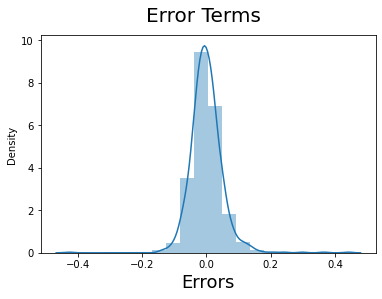

In [1095]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Observation: 
##### Plot shows normalized behaviour - model can be used to predict test data

## Step 9: Scaling and predicting target using test data

In [1096]:
df_test[numvars] = scaler.transform(df_test[numvars])

In [1097]:
df_test.head()

LotFrontage   LotArea  MasVnrArea  2ndFlrSF  GarageArea  WoodDeckSF  \
1436     0.133562  0.035192         0.0  0.000000    0.372355    0.000000   
57       0.232877  0.047566         0.0  0.416465    0.398449    0.000000   
780      0.143836  0.029930        38.0  0.000000    0.283498    0.256709   
382      0.198630  0.036338         0.0  0.415496    0.450635    0.168028   
1170     0.188356  0.039309         0.0  0.000000    0.252468    0.236873   

      OpenPorchSF  SalePrice  sold_from_built  sold_from_mod  ...  Gd_qlty  \
1436     0.000000   0.118872         0.264706       0.606557  ...        0   
57       0.133843   0.224413         0.014706       0.049180  ...        1   
780      0.040153   0.195945         0.088235       0.196721  ...        0   
382      0.101338   0.248021         0.007353       0.032787  ...        1   
1170     0.000000   0.189002         0.227941       0.524590  ...        0   

      Gd_bql  TA_bql  Gd_bexp  No_bexp  GLQ_bft1  Gd_kql  Sev  Con  MaySell  
1436       0       1        0        1         0       0    0    0        1  
57         1       0        0        1         0       1    0    0        0  
780        1       0        0        1         0       0    0    0        0  
382        1       0        0        0         0       1    0    0        0  
1170       0       1        0        0         0       0    0    0        0  

[5 rows x 33 columns]

In [1098]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [1099]:
# Dropping highly correlated variables and insignificant variables
#droplst = ["mar", "oct", "wed", "sun", "jul", "jun", "thu", "tue", "hum", 'may']
#X_test_m = X_test.drop(droplst, 1,) # mar, oct, wed, sun, jul, jun, thu

In [1100]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [1101]:
# Making predictions using the fourth model

y_pred_m4 = lr_1.predict(X_test_m4)

Text(0, 0.5, 'y_pred')

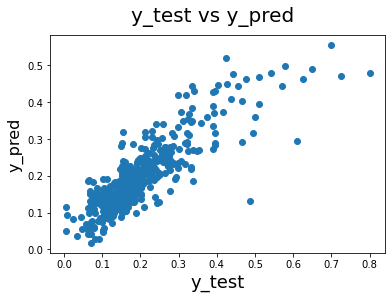

In [1102]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

Text(0, 0.5, 'y_pred')

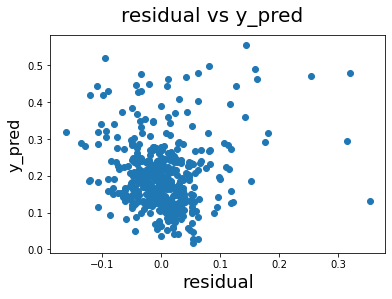

In [1103]:
# Plotting residual vs y_pred to understand the spread

fig = plt.figure()
plt.scatter((y_test - y_pred_m4), y_pred_m4)
fig.suptitle('residual vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('residual', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

Text(0.5, 0, 'Errors')

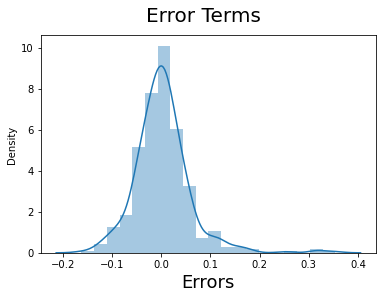

In [1104]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_m4), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [1105]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.7295705883917168

In [1106]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

In [1107]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1108]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1.0}


In [1123]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 8.31329386e-02  1.49216202e-01  4.99731267e-05  1.42724358e-01
  1.29516025e-01  4.82853169e-02  5.89147442e-02 -9.25869362e-02
 -3.57185960e-02  1.63062579e-02  2.35445226e-02  3.71578805e-02
  2.71172018e-02  7.67521156e-02 -2.43438395e-02 -2.80338944e-02
  9.56709435e-02  7.18866807e-02  8.02519112e-02  1.16453407e-02
 -3.54691286e-02 -1.57484658e-01  1.95640816e-02 -3.89134498e-02
 -2.48097852e-02  5.05987449e-02 -9.34812140e-03  2.24007306e-02
 -1.39541166e-02 -4.98344671e-02  5.46408298e-02  7.21160104e-03]


In [1124]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.7808366584620873
0.7421750730615686
2.696811154448284
1.401490207548656
0.0026413429524468988
0.0031997493323028675


Text(0.5, 0, 'Errors')

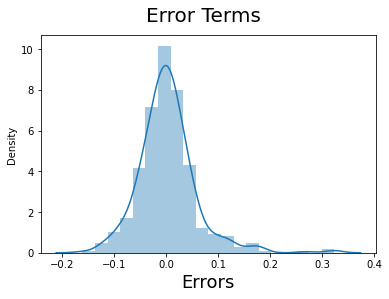

In [1111]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [1112]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1113]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [1114]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [1115]:
lasso.coef_

array([ 7.39333513e-02,  1.78882960e-01,  5.13115689e-05,  1.43833736e-01,
        1.32556900e-01,  4.45226266e-02,  5.60602197e-02, -9.36170014e-02,
       -3.53403573e-02,  1.61907182e-02,  1.56018931e-02,  3.66244567e-02,
        2.47797867e-02,  7.59400795e-02, -2.21124421e-02, -2.56859840e-02,
        9.51630190e-02,  7.16144466e-02,  7.89723512e-02,  1.07744500e-02,
       -2.94745043e-02, -2.17154271e-01,  1.88831017e-02, -3.84685445e-02,
       -2.38914092e-02,  5.02432658e-02, -9.25443320e-03,  2.25460811e-02,
       -1.25071331e-02, -0.00000000e+00,  3.12162771e-02,  6.56343627e-03])

In [1116]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.7813418238951635
0.7383520770024514
2.690595079418573
1.4222713306307906
0.0026352547300867515
0.0032471948187917593


Text(0.5, 0, 'Errors')

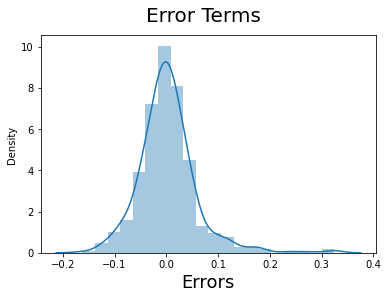

In [1117]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

# Comparing results

In [1118]:
# Creating a table which contain all the metrics


rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

Ridge Regression  Lasso Regression
0          0.780837          0.781342
1          0.742175          0.738352
2          2.696811          2.690595
3          1.401490          1.422271
4          0.051394          0.051335
5          0.056566          0.056984

In [1119]:
betas = pd.DataFrame(index=X_test.columns)

In [1120]:
betas.rows = X_test.columns

In [1121]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [1122]:
pd.set_option('display.max_rows', None)
betas.head(40)

Ridge     Lasso
LotFrontage      0.083133  0.073933
LotArea          0.149216  0.178883
MasVnrArea       0.000050  0.000051
2ndFlrSF         0.142724  0.143834
GarageArea       0.129516  0.132557
WoodDeckSF       0.048285  0.044523
OpenPorchSF      0.058915  0.056060
sold_from_built -0.092587 -0.093617
sold_from_mod   -0.035719 -0.035340
remodeled        0.016306  0.016191
ONEHALFSTORYD    0.023545  0.015602
ONESTORYA        0.037158  0.036624
CulDSac          0.027117  0.024780
Crawfor          0.076752  0.075940
Edwards         -0.024344 -0.022112
Mitchel         -0.028034 -0.025686
NoRidge          0.095671  0.095163
NridgHt          0.071887  0.071614
StoneBr          0.080252  0.078972
Norm1            0.011645  0.010774
RRAe1           -0.035469 -0.029475
PosN2           -0.157485 -0.217154
Gd_qlty          0.019564  0.018883
Gd_bql          -0.038913 -0.038469
TA_bql          -0.024810 -0.023891
Gd_bexp          0.050599  0.050243
No_bexp         -0.009348 -0.009254
GLQ_bft1         0.022401  0.022546
Gd_kql          -0.013954 -0.012507
Sev             -0.049834 -0.000000
Con              0.054641  0.031216
MaySell          0.007212  0.006563